<a href="https://colab.research.google.com/github/Gehlen05/modelos-deteccao-fraude/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rede Neural Autoencoder para Detecção de Fraude
    Neste trabalho foi desenvolvida uma rede neural Autoencoder para detecção de fraudes em transações de cartão de
    crédito. O dataset utilizado está disponível na kaggle. O dataset é desbalanceado como mostrado em trabalhos
    passados, onde a parte de tratamento dos dados foi explicado nos trabalhos anteriores. Neste será focado na
    explicação do desenvolvimento da rede neural.
    Link trabalho passado:
    https://github.com/Gehlen05/Aprendizado-Maquina/blob/main/Regressao_logistica_arvore_knn_deteccao_fraude_cartao_credito.ipynb

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ast import increment_lineno
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
import pickle

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Segue a importação do *dataset*, e o cabeçalho deste:

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/creditcard_normalizado.csv')
df.head()

Mounted at /content/drive


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Normalização de grandezas como tempo e dinheiro:

# Treinamento com transações legítimas

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
nb_epoch = 30
batch_size = 128
input_dim = x_train.shape[1] #num of columns, 30
encoding_dim = 18
hidden_dim1 = 30 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 15
hidden_dim3 = 5
learning_rate = 1e-7
input_dim

30

In [ ]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="elu")(encoder)
encoder = Dense(hidden_dim2, activation="elu")(encoder)
encoder = Dense(hidden_dim3, activation="tanh")(encoder)
decoder = Dense(hidden_dim3, activation='elu')(encoder)
decoder = Dense(hidden_dim2, activation='tanh')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='elu')(decoder)

# This creates a model that includes
# the Input layer and four Dense layers
autoencoder = Model(inputs=input_layer, outputs=decoder)



In [ ]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
epochs_hist = autoencoder.fit(x_train, x_train, epochs=nb_epoch,
                              batch_size=batch_size, shuffle=True)

Epoch 1/30
1781/1781 [==============================] - 22s 7ms/step - loss: 0.8986 - accuracy: 0.6055
Epoch 2/30
1781/1781 [==============================] - 11s 6ms/step - loss: 0.7339 - accuracy: 0.6509
Epoch 3/30
1781/1781 [==============================] - 11s 6ms/step - loss: 0.6776 - accuracy: 0.6667
Epoch 4/30
1781/1781 [==============================] - 11s 6ms/step - loss: 0.6418 - accuracy: 0.6730
Epoch 5/30
1781/1781 [==============================] - 10s 6ms/step - loss: 0.6191 - accuracy: 0.6750
Epoch 6/30
1781/1781 [==============================] - 10s 6ms/step - loss: 0.6039 - accuracy: 0.6760
Epoch 7/30
1781/1781 [==============================] - 11s 6ms/step - loss: 0.5932 - accuracy: 0.6778
Epoch 8/30
1781/1781 [==============================] - 12s 7ms/step - loss: 0.5855 - accuracy: 0.6802
Epoch 9/30
1781/1781 [==============================] - 10s 6ms/step - loss: 0.5780 - accuracy: 0.6842
Epoch 10/30
1781/1781 [==============================] - 10s 6ms/step - l

# Criação de arquivo do modelo

In [ ]:
# import pickle

meu_arquivo = open('modelo_autoencoder_legitimo_fraude_treinamento_30_versao_semente_42.pkl',  'wb')

pickle.dump(autoencoder, meu_arquivo)
meu_arquivo.close()

In [ ]:
# open a file, where you stored the pickled data
# file = open('modelo_autoencoder_legitimo.pkl', 'rb')

# dump information to that file
# autoencoder = pickle.load(file)

# Testes para casos legítimos

In [ ]:
test_x_predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - test_x_predictions, 2), axis=1) # original
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

1781/1781 [==============================] - 5s 3ms/step


,Reconstruction_error,True_class
count,56962.000000,56962.000000
mean,0.495662,0.001720
std,2.996341,0.041443
min,0.010981,0.000000
25%,0.130218,0.000000
50%,0.212169,0.000000
75%,0.370477,0.000000
max,238.145504,1.000000


In [ ]:
error_df.head(10)

,Reconstruction_error,True_class
0,65.025516,1
1,0.372066,0
2,0.128876,0
3,0.193690,0
4,0.071721,0
5,0.467840,0
6,0.065913,0
7,0.272634,0
8,0.185928,0
9,2.005282,0


# Tabela Confusão dos diferentes Thrshold`s

Acurácia:  0.9491415329517924
Acurácia:  0.9768793230574769
Acurácia:  0.9847793265685896
Acurácia:  0.9888346617042941
Acurácia:  0.9911344405041957
Acurácia:  0.992573996699554


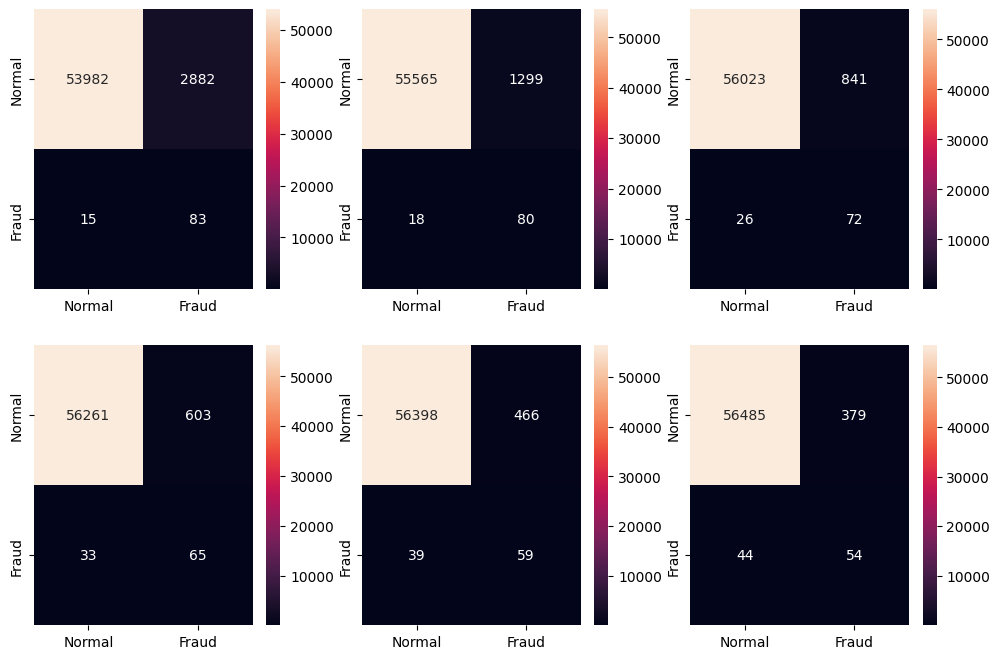

In [ ]:
valores_threshold = range(1, 7, 1)
for threshold in valores_threshold:
  LABELS = ["Normal","Fraud"]
  pred_y = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]
  conf_matrix = confusion_matrix(error_df.True_class, pred_y)

  plt.subplot(2, 3, threshold)
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  print('Acurácia: ', metrics.accuracy_score(y_test, pred_y))
plt.rcParams['figure.figsize'] = (12., 8.)
plt.show()

In [ ]:
reconstructions = autoencoder.predict(x_train)
train_loss = tf.keras.losses.mae(reconstructions, x_train)


7121/7121 [==============================] - 15s 2ms/step


# Gráfico de perda do treino

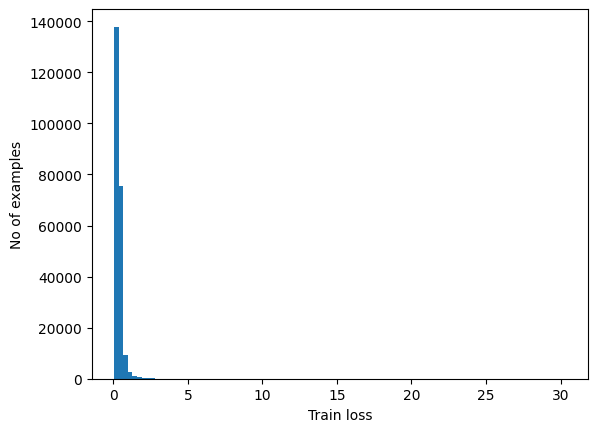

In [ ]:
plt.hist(train_loss[None,:], bins=100)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

# Curva ROC


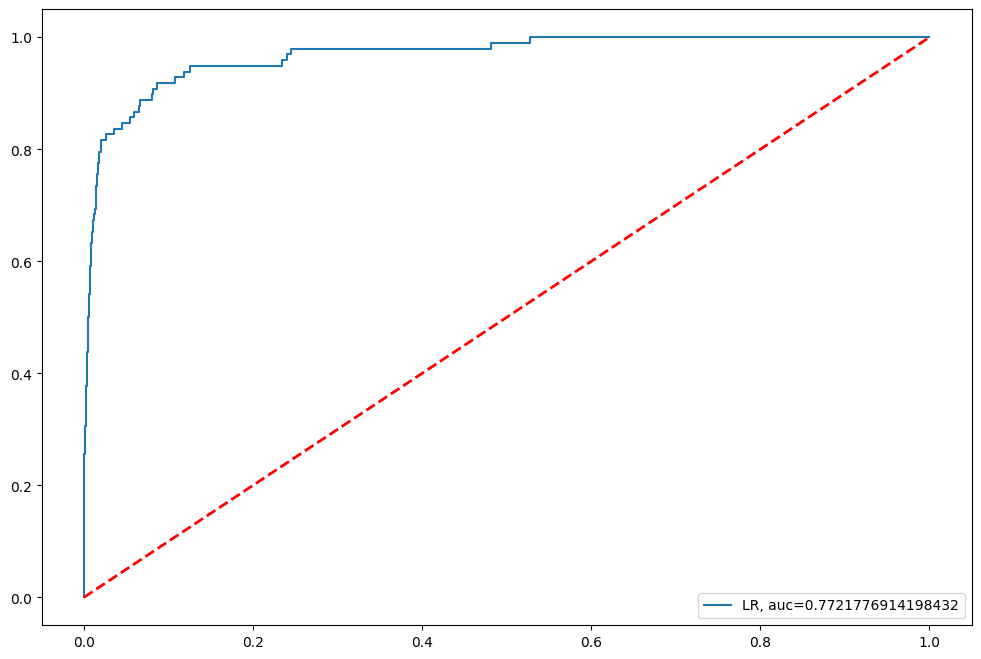

In [ ]:
fpr, tpr, _ = metrics.roc_curve(error_df.True_class, error_df.Reconstruction_error)
auc = metrics.roc_auc_score(y_test, pred_y)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label ="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle ='--')
plt.legend(loc=4)

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

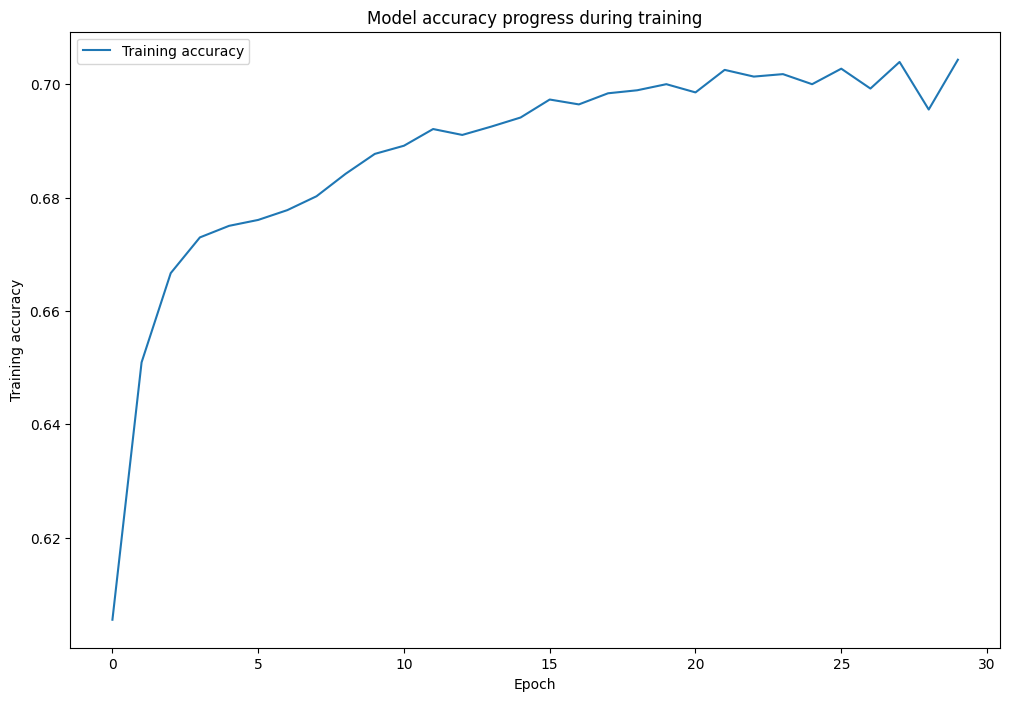

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

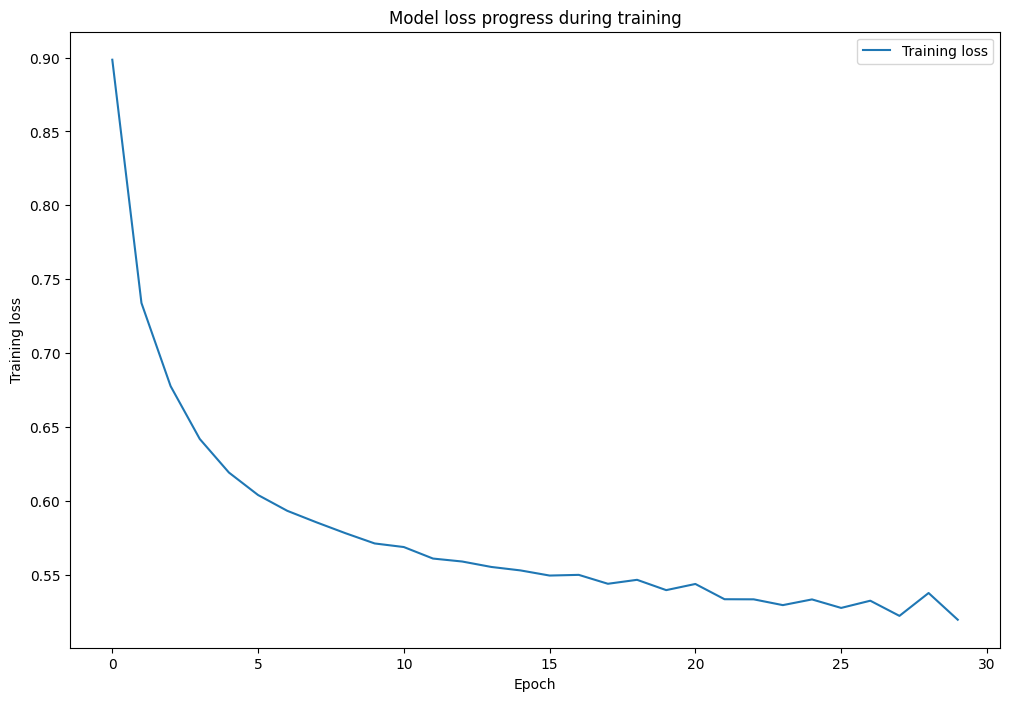

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])